In [19]:
from PIL import Image
from openpyxl import Workbook
import os
import re

# Natural sorting function
def natural_sort_key(s):
    return [int(text) if text.isdigit() else text.lower() for text in re.split(r'(\d+)', s)]

# Function to extract pixel values from an image
def extract_pixels(image_path):
    img = Image.open(image_path)
    img_gray = img.convert('L')
    img_resize = img_gray.resize((48, 48))
    pixels = list(img_resize.getdata())
    # Flatten the list of pixels into a single string
    pixels_str = ' '.join(map(str, pixels))
    return pixels_str

# Folder containing the images
folder_path = "SarcasmFrames"

# Create a new Excel workbook
wb = Workbook()
ws = wb.active

# Write headers
ws.append(['Image 1', 'Image 2', 'Image 3'])

# Initialize row index
row_idx = 1

# Get sorted list of image filenames
image_filenames = sorted(os.listdir(folder_path), key=natural_sort_key)

# Loop through the images in the folder
for idx, filename in enumerate(image_filenames, start=1):
    if filename.lower().endswith('.png') or filename.lower().endswith('.jpg') or filename.lower().endswith('.jpeg'):
        image_path = os.path.join(folder_path, filename)
        pixels_str = extract_pixels(image_path)
        
        # Determine column index based on image number
        col_idx = (idx - 1) % 3 + 1
        
        # Write pixel values to the Excel sheet
        ws.cell(row=row_idx, column=col_idx, value=pixels_str)
        
        # Move to next row after every third image
        if idx % 3 == 0:
            row_idx += 1

# Save the Excel workbook
excel_file = "pixels_data.xlsx"
wb.save(excel_file)

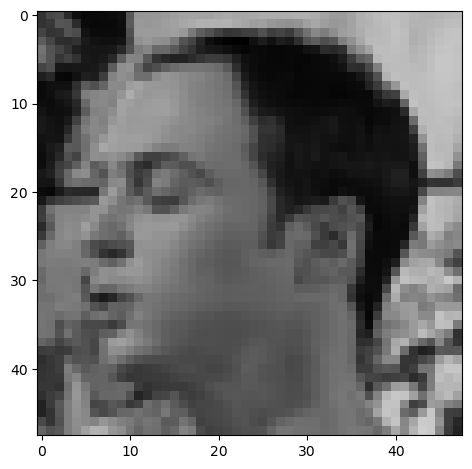

In [23]:
from skimage import io
import numpy as np
from openpyxl import load_workbook

# Load workbook with pixel values
wb = load_workbook('pixels_data.xlsx')
ws = wb.active

# Read serialized data from cell A1
serialized_data = ws['A1'].value

# Split the string by spaces to extract individual pixel values
deserialized_list = serialized_data.split(' ')

# Convert the list of strings to a list of integers
deserialized_list = [int(pixel) for pixel in deserialized_list]

# Convert the list to a numpy array
image_array = np.array(deserialized_list, dtype=np.uint8)

# Assuming the image is square, calculate the image shape
image_size = int(np.sqrt(len(deserialized_list)))
image_shape = (image_size, image_size)

# Reshape the array into the image shape
image_array = image_array.reshape(image_shape)

# Display the image
io.imshow(image_array)
io.show()